<a href="https://colab.research.google.com/github/Nipuna-Vishwajith/Deep-Learning/blob/main/image_classifier_I_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets -q


In [22]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as od

In [23]:
od.download("https://www.kaggle.com/datasets/sanjoybijoy/catsanddogs/data")

Skipping, found downloaded files in "./catsanddogs" (use force=True to force download)


In [24]:
BATCH_SIZE = 32
IMAGE_SIZE = (128,128)

In [25]:

train_data_dir = "/content/catsanddogs/cats and dogs images/dataset/training_set"
test_data_dir = "/content/catsanddogs/cats and dogs images/dataset/test_set"

train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=0.2,
                                                         seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='validation',
                                                         validation_split=0.2,
                                                         seed=42)
#subset='validation' is the key word here.
test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

Found 8000 files belonging to 2 classes.
Using 6400 files for training.
Found 8000 files belonging to 2 classes.
Using 1600 files for validation.
Found 2000 files belonging to 2 classes.


In [26]:
class_names = train_data.class_names
print(class_names)

['cats', 'dogs']


In [27]:
for image_batch,label_batch in train_data.take(1):
    print(image_batch.shape)
    print(label_batch.shape)
    # here first line describes 32 = at once model is showed 32 images, 128 by 128, 3 = RGB
    # second line  describes 32 lables for 32 images

(32, 128, 128, 3)
(32,)


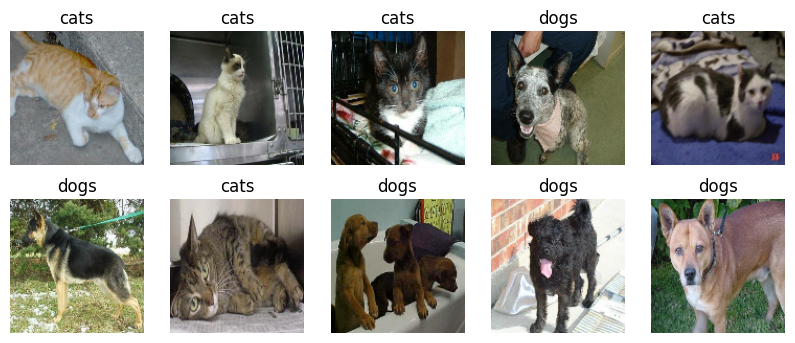

In [29]:
# plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):#images from 1st batch
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')


Feature Scalling

In [30]:
# feature scaling
# normally images are in 0 - 255 pixels. in here we use 128 by 128. From the feature scalling we scale these things into 0 - 1.
# low computational power

for image,label in train_data.take(1):
    for i in range(1):
      print(image) #printing one image as a tensor matrix

tf.Tensor(
[[[[ 38.55078     21.550781    31.550781  ]
   [ 39.90625     22.90625     32.90625   ]
   [ 36.6875      19.6875      29.6875    ]
   ...
   [  0.           1.           0.        ]
   [  0.           0.           0.        ]
   [  0.           0.           0.        ]]

  [[ 38.44922     21.449219    31.449219  ]
   [ 37.328125    20.328125    30.328125  ]
   [ 35.32422     18.324219    28.324219  ]
   ...
   [  0.           0.           0.        ]
   [  0.           0.32421875   0.        ]
   [  0.           0.           0.        ]]

  [[ 39.987534    22.987534    32.987534  ]
   [ 38.27568     21.27568     31.27568   ]
   [ 38.039062    21.039062    31.039062  ]
   ...
   [  1.           0.           0.        ]
   [  0.           1.           0.        ]
   [  0.           0.           0.        ]]

  ...

  [[184.55377    171.84134    185.32405   ]
   [191.96484    179.41348    193.68916   ]
   [197.16423    183.4764     196.32031   ]
   ...
   [ 12.           1.   

In [31]:

train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [32]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image) #printing one image as a tensor matrix

tf.Tensor(
[[[[0.33361313 0.3732118  0.46510825]
   [0.28804237 0.20327064 0.37857547]
   [0.3038884  0.16342941 0.37726966]
   ...
   [0.5541973  0.39748776 0.3320772 ]
   [0.54515934 0.3999081  0.337163  ]
   [0.53333336 0.40392157 0.3372549 ]]

  [[0.35903955 0.42570156 0.45473346]
   [0.33983907 0.2941083  0.4078691 ]
   [0.2924788  0.16569453 0.35958216]
   ...
   [0.5516391  0.4040288  0.33469668]
   [0.55417734 0.41420168 0.34738782]
   [0.5462929  0.4168811  0.34748775]]

  [[0.37059075 0.44638732 0.4476997 ]
   [0.36649793 0.38684884 0.43119627]
   [0.31189275 0.24541698 0.38218993]
   ...
   [0.551011   0.40784314 0.33628982]
   [0.5431222  0.41754007 0.3352484 ]
   [0.54509807 0.41960785 0.33532476]]

  ...

  [[0.8127298  0.7617494  0.73822   ]
   [0.8147212  0.7676624  0.72054225]
   [0.8104905  0.76343167 0.7085297 ]
   ...
   [0.8097607  0.7823097  0.75093716]
   [0.8090001  0.78933096 0.76578647]
   [0.79248106 0.7728732  0.75520056]]

  [[0.80693775 0.75595737 0.732427

Data Augmentation

In [33]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
  ]
)


Model Building

In [35]:

model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [36]:

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [37]:

start_time = time.time()

history = model.fit(train_data,
                    epochs=20,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/20
200/200 [==============================] - 18s 48ms/step - loss: 0.6839 - accuracy: 0.5853 - val_loss: 0.6844 - val_accuracy: 0.5081
Epoch 2/20
200/200 [==============================] - 9s 46ms/step - loss: 0.6448 - accuracy: 0.6120 - val_loss: 0.6561 - val_accuracy: 0.5906
Epoch 3/20
200/200 [==============================] - 9s 45ms/step - loss: 0.6266 - accuracy: 0.6495 - val_loss: 0.6156 - val_accuracy: 0.6500
Epoch 4/20
200/200 [==============================] - 10s 48ms/step - loss: 0.6045 - accuracy: 0.6642 - val_loss: 0.6367 - val_accuracy: 0.6694
Epoch 5/20
200/200 [==============================] - 10s 48ms/step - loss: 0.5887 - accuracy: 0.6831 - val_loss: 0.9011 - val_accuracy: 0.5731
Epoch 6/20
200/200 [==============================] - 10s 47ms/step - loss: 0.5713 - accuracy: 0.6988 - val_loss: 0.5408 - val_accuracy: 0.7362
Epoch 7/20
200/200 [==============================] - 13s 64ms/step - loss: 0.5518 - accuracy: 0.7155 - val_loss: 0.6434 - val_accuracy: 0

In [38]:

print(f'Total time for training {(end_time-start_time):.3f} seconds')

Total time for training 263.892 seconds


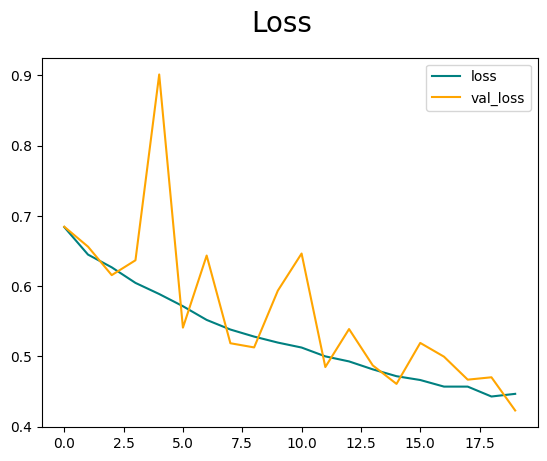

In [39]:

fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

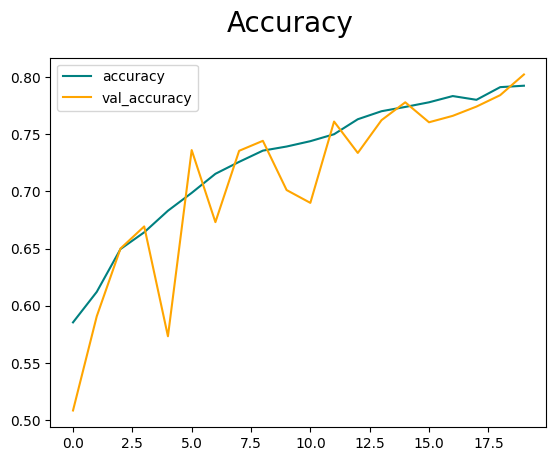

In [40]:

fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()


In [41]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)



1/1 [==============================] - 0s 343ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.801>

In [43]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7644991>

In [44]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.87>

In [45]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.801>

In [46]:
!pip install opencv-python -q

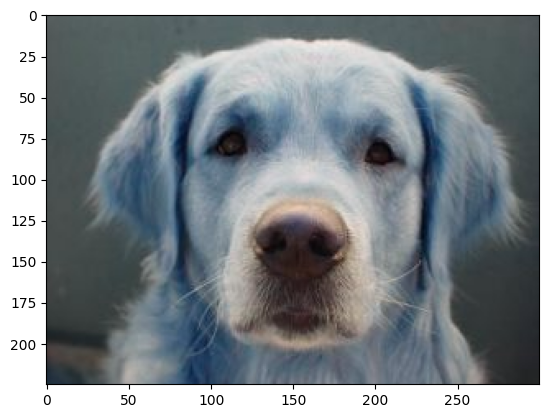

In [53]:
import cv2

img = cv2.imread('/content/catsanddogs/cats and dogs images/dataset/private test/Golden-Retriever-Picture-300x225.jpg')
plt.imshow(img)
plt.show()

In [54]:
resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255

yhat = model.predict(np.expand_dims(scaled_image, 0))


1/1 [==============================] - 0s 28ms/step


In [55]:
if yhat > 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')

dogs
